Link to dataset : https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings/downloads/video-game-sales-with-ratings.zip/2

# Univariate Analysis on Video Game Sales

Check and import the required libraries

In [54]:
import os
import pandas as pd
import numpy as np
import dask.dataframe
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()
filename=input('Enter Filename:')
filename =filename + '.csv'

Enter Filename:Video_Games_Sales_as_at_22_Dec_2016.csv


Use different methods to read files

In [3]:
%%time
data=pd.read_csv(filename)

Wall time: 527 ms


In [6]:
%%time
data=dask.dataframe.read_csv(filename)

Wall time: 42.1 ms


Analyse the structure

In [16]:
print(data.shape)
print(data.dtypes)

(16719, 16)
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object


In [17]:
data_random=data.sample(1000)
data_random.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
4591,JGTC: All-Japan Grand Touring Car Championship,PS,1998.0,Racing,TYO,0.23,0.16,0.00,0.03,0.42,NaN,NaN,NaN,NaN,NaN,NaN
11311,SingStar: Made In Germany,PS3,2009.0,Misc,Sony Computer Entertainment,0.00,0.06,0.00,0.02,0.08,NaN,NaN,NaN,NaN,NaN,NaN
4715,Densha De Go! 2,PS,1999.0,Simulation,Taito,0.00,0.00,0.38,0.03,0.41,NaN,NaN,NaN,NaN,NaN,NaN
5664,UEFA Euro 2008 Austria-Switzerland,PS2,2008.0,Sports,Electronic Arts,0.03,0.00,0.00,0.28,0.32,NaN,NaN,NaN,NaN,NaN,NaN
15033,Jikkyou Powerful Pro Yakyuu 12 Ketteiban,GC,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.02,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN
6908,Galaga: Destination Earth,PS,2000.0,Shooter,Hasbro Interactive,0.13,0.09,0.00,0.02,0.24,NaN,NaN,8,10.0,Hasbro Interactive,E
16401,Rakushou! Pachi-Slot Sengen 4,PS2,2006.0,Misc,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
6949,Disney's A Christmas Carol,DS,2009.0,Adventure,Disney Interactive Studios,0.21,0.01,0.00,0.02,0.23,66.0,7.0,6.5,4.0,Sumo Digital,E
6601,The Suite Life of Zack & Cody: Tipton Trouble,DS,2006.0,Action,Disney Interactive Studios,0.23,0.00,0.00,0.02,0.25,NaN,NaN,NaN,NaN,NaN,NaN
11098,Sega Casino,DS,2005.0,Misc,Sega,0.08,0.00,0.00,0.01,0.09,61.0,13.0,NaN,NaN,TOSE,T


In [18]:
colnames=data.columns.tolist()
print("Column Names :",colnames)

Column Names : ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']


Define datatype only interger and float

In [4]:
datatype=['int16','int32','int64','float16','float32','float64']
data= data.select_dtypes(include=datatype)
data.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
0,2006.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,322.0
1,1985.0,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,2008.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,709.0
3,2009.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,192.0
4,1996.0,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN


Check the summary of all the columns

In [20]:
data.describe(include='all')

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


Check for tha na values

In [21]:
print(data.isnull().sum(axis=0))

Year_of_Release     269
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Count         9129
dtype: int64


Drop all the na values and check the shape

In [23]:
data=data.dropna()

In [24]:
data.shape

(6894, 9)

Use colname to get the column name of data type int

In [5]:
colname=data.columns.tolist()
print("Column Names :",colname)

Column Names : ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count']


 Generate mean,median,mode,sd,var,range,iqr for all the columns

In [6]:
maxi =['Maximum']+data.max(axis=0,skipna=True).tolist()
mini=['Minimum']+data.min(axis=0,skipna=True).tolist()
mean_data=['Mean']+data.mean(axis=0,skipna=True).tolist()
median   =['Median']+data.median(axis=0,skipna=True).tolist()
mode1=data.mode(axis=0)
mode1=mode1.values.tolist()
mode=['mode']
for i in mode1[0]:
    mode.append(i)
colname=['Operations']+list(data.columns)
l1=[colname,maxi,mini,mean_data,median,mode]
print(l1)
      

[['Operations', 'Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count'], ['Maximum', 2020.0, 41.36, 28.96, 10.22, 10.57, 82.53, 98.0, 113.0, 10665.0], ['Minimum', 1980.0, 0.0, 0.0, 0.0, 0.0, 0.01, 13.0, 3.0, 4.0], ['Mean', 2006.4873556231003, 0.2633303427238687, 0.14502482205876838, 0.07760212931394815, 0.04733177821639351, 0.5335426759974459, 68.96767850559173, 26.360820941378886, 162.22990777338603], ['Median', 2007.0, 0.08, 0.02, 0.0, 0.01, 0.17, 71.0, 21.0, 24.0], ['mode', 2008.0, 0.0, 0.0, 0.0, 0.0, 0.02, 70.0, 4.0, 4.0]]


In [7]:
variance =['Variance']+data.var(axis=0,skipna=True).tolist()
standarddev=['Standard Deviation']+data.std(axis=0) .tolist()
q1=['Quatile 1']+data.quantile(0.25,axis=0) .tolist()
q2=['Quatile 2']+data.quantile(0.5,axis=0) .tolist()
q3=['Quatile 3']+data.quantile(0.75,axis=0) .tolist()
colname=['Operations']+list(data.columns)
l=[colname,variance,standarddev,q1,q2,q3]
print(l)

[['Operations', 'Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Count'], ['Variance', 34.562579486269144, 0.6618047593323195, 0.25329407612752874, 0.09536860685274313, 0.03486058563383294, 2.396103150334869, 194.27243110213473, 360.25917277731503, 315037.8497576681], ['Standard Deviation', 5.87899476834851, 0.8135138347516405, 0.503283296094286, 0.3088180805146343, 0.18670989698950866, 1.5479351247177218, 13.938164552843201, 18.98049453458247, 561.282326247378], ['Quatile 1', 2003.0, 0.0, 0.0, 0.0, 0.0, 0.06, 60.0, 12.0, 10.0], ['Quatile 2', 2007.0, 0.08, 0.02, 0.0, 0.01, 0.17, 71.0, 21.0, 24.0], ['Quatile 3', 2010.0, 0.24, 0.11, 0.04, 0.03, 0.47, 79.0, 36.0, 81.0]]


In [9]:
import prettytable
tab=prettytable.PrettyTable(l[0])
for i in range(1,len(l)):
    tab.add_row(l[i])
print(tab)

+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+--------------------+--------------------+--------------------+-------------------+
|     Operations     |  Year_of_Release   |      NA_Sales      |       EU_Sales      |       JP_Sales      |     Other_Sales     |    Global_Sales    |    Critic_Score    |    Critic_Count    |     User_Count    |
+--------------------+--------------------+--------------------+---------------------+---------------------+---------------------+--------------------+--------------------+--------------------+-------------------+
|      Variance      | 34.562579486269144 | 0.6618047593323195 | 0.25329407612752874 | 0.09536860685274313 | 0.03486058563383294 | 2.396103150334869  | 194.27243110213473 | 360.25917277731503 | 315037.8497576681 |
| Standard Deviation |  5.87899476834851  | 0.8135138347516405 |  0.503283296094286  |  0.3088180805146343 | 0.18670989698950866 | 1.54793512471

Plot a boxplot for all the columns

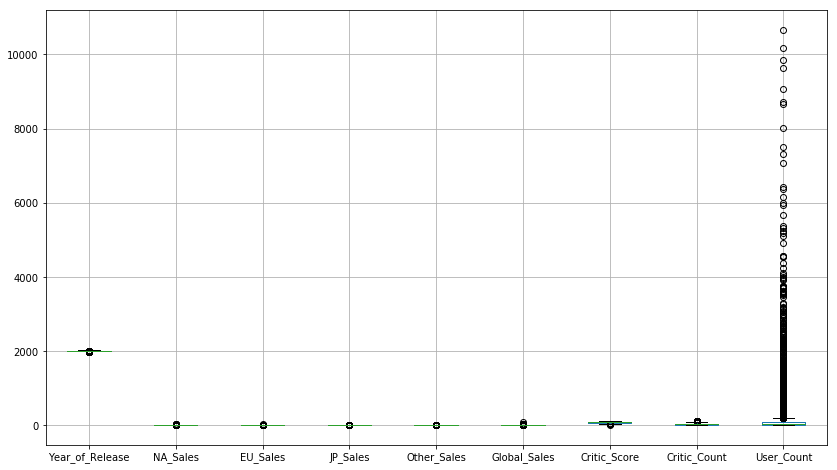

In [43]:
plt.figure(figsize=(14,8))
data.boxplot()
plt.show()

Check histogram plot to analyse the distribution of every variable

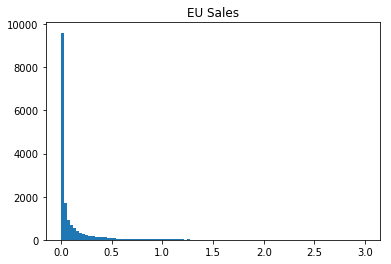

In [54]:
bins = np.linspace(0, 3, 100)
plt.hist(data['EU_Sales'], bins)
plt.title('EU Sales')
plt.show()


To change the skewness while taking log use log(1+value) because log 0 is undefined so it is advisable to use 1+log

The EU_Sales is right skewed.For right skew we can use log,square root or cube root conversion.

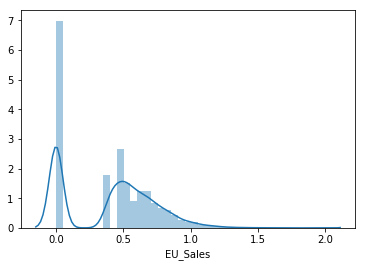

In [60]:
sns.distplot(np.power(data.EU_Sales.dropna(),1/5))
plt.show()

From the above the transformation was somewhat successful for data without zeros

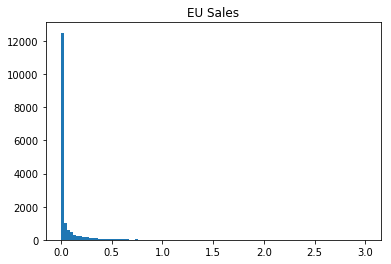

In [55]:
plt.hist(data['JP_Sales'], bins)
plt.title('JP Sales')
plt.show()

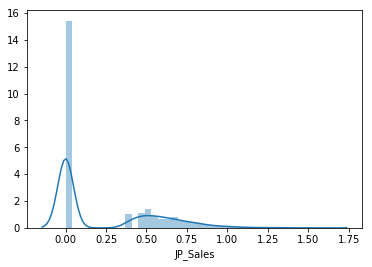

In [83]:
sns.distplot(np.power(data.JP_Sales.dropna(),1/5))
plt.show()

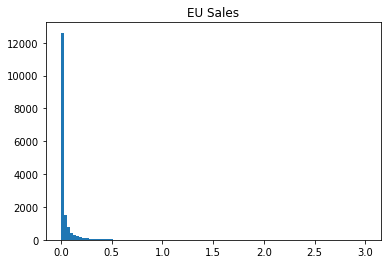

In [56]:
plt.hist(data['Other_Sales'], bins)
plt.title('Other Sales')
plt.show()

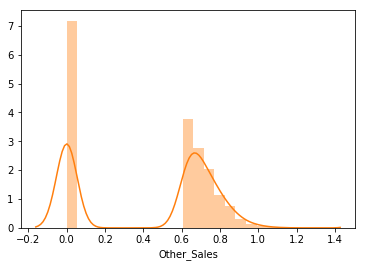

In [80]:
sns.distplot(np.power(data.Other_Sales.dropna(),1/10))
plt.show()

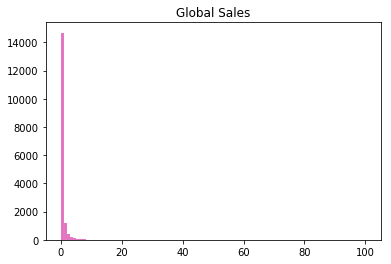

In [64]:
plt.hist(data['Global_Sales'], bins)
plt.title('Global Sales')
plt.show()

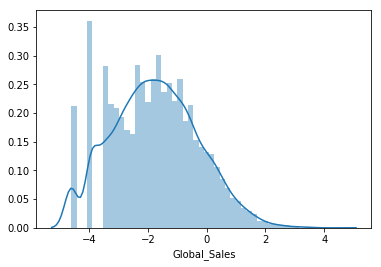

In [74]:
sns.distplot(np.log(data.Global_Sales.dropna()))
plt.show()

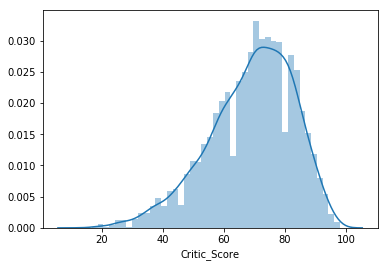

In [70]:
sns.distplot(data.Critic_Score.dropna())
plt.show()

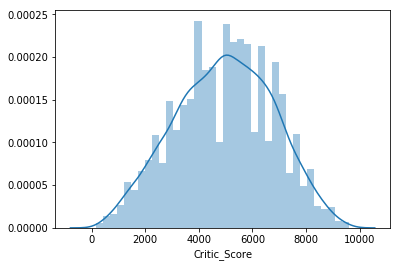

In [71]:
sns.distplot(np.power(data.Critic_Score.dropna(),2))
plt.show()

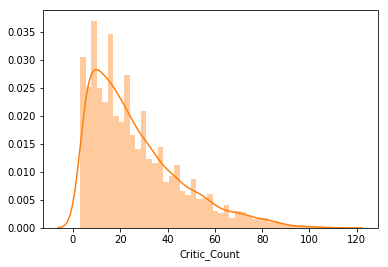

In [64]:
sns.distplot(data.Critic_Count.dropna())
plt.show()

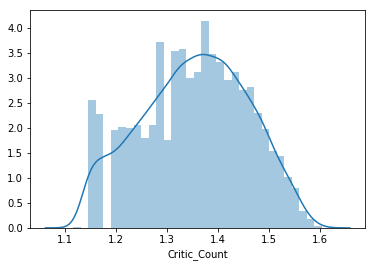

In [69]:
sns.distplot(np.power(data.Critic_Count.dropna(),1/10))
plt.show()

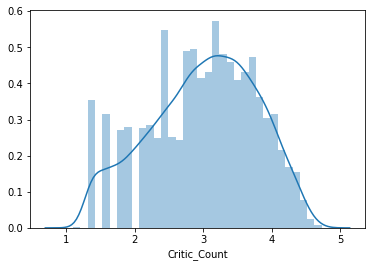

In [68]:
sns.distplot(np.log(data.Critic_Count.dropna()))
plt.show()

For crtic count power of 1/10 is more symmetric than log .

From the above graphs it is seen that all the sales are right skewed/positive skew.so it is unserstood that it is not normally distributes .So we need to perform some covversion techniques.

Find the outlier boundaries by the method of 1.5(IQR)

In [16]:
iqr=(data.quantile(0.75,axis=0)-data.quantile(0.25,axis=0)).tolist()
iqr

[7.0, 0.24, 0.11, 0.04, 0.03, 0.41, 19.0, 24.0, 71.0]

Lower Boundary and  Higher Boundary

In [21]:
lowerboundary=(data.quantile(0.25,axis=0)-(1.5*(data.quantile(0.5,axis=0)-data.quantile(0.25,axis=0))))
print(lowerboundary)

Year_of_Release    1997.000
NA_Sales             -0.120
EU_Sales             -0.030
JP_Sales              0.000
Other_Sales          -0.015
Global_Sales         -0.105
Critic_Score         43.500
Critic_Count         -1.500
User_Count          -11.000
dtype: float64


In [22]:
higherboundary=(data.quantile(0.75,axis=0)+(1.5*(data.quantile(0.5,axis=0)-data.quantile(0.25,axis=0))))
print(higherboundary)

Year_of_Release    2016.000
NA_Sales              0.360
EU_Sales              0.140
JP_Sales              0.040
Other_Sales           0.045
Global_Sales          0.635
Critic_Score         95.500
Critic_Count         49.500
User_Count          102.000
dtype: float64


To findout how many outliers are there in each column

In [37]:
higherboundary=higherboundary
lowerboundary=lowerboundary
le=[]
x=[]
for i in range (1,len(colname)):
    k=0
    k=k+data[colname[i]][data[colname[i]]<lowerboundary[i-1]].count()
    k=k+data[colname[i]][data[colname[i]]>higherboundary[i-1]].count()
    x.append(k)
    le.append([colname[i],k])
print(le)

[['Year_of_Release', 974], ['NA_Sales', 2868], ['EU_Sales', 3464], ['JP_Sales', 3811], ['Other_Sales', 3452], ['Global_Sales', 3171], ['Critic_Score', 463], ['Critic_Count', 1047], ['User_Count', 1630]]


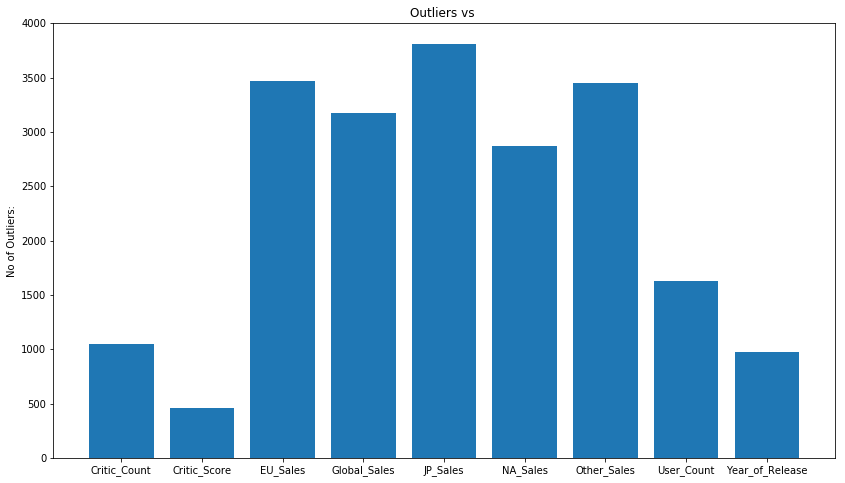

In [50]:
plt.figure(figsize=(14,8))
y_pos=colname[1:]
plt.bar(y_pos,x)
plt.ylabel('No of Outliers:')
plt.title('Outliers vs ')
plt.show()

From the above jp_sales has most of teh outliers nearly half of data points lie outside